In [1]:
%matplotlib inline

In [2]:
import sectionate
import xarray as xr

In [3]:
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [3]:
#ds = xr.open_dataset('/Users/raphael/STORAGE/MOM6/CMIP6/tos_Omon_GFDL-CM4_piControl_r1i1p1f1_gn_015101-017012.nc')

In [4]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [5]:
dog = col.search(source_id='GFDL-CM4', member_id='r1i1p1f1', variable_id='tos', grid_label='gn')
dog.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,CMIP,NOAA-GFDL,GFDL-CM4,1pctCO2,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/1pctCO2/r1i...,NaN
1,CMIP,NOAA-GFDL,GFDL-CM4,abrupt-4xCO2,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/abrupt-4xCO...,NaN
2,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Oday,tos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
3,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
4,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r...,NaN
5,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,tos,gn,gs://cmip6/OMIP/NOAA-GFDL/GFDL-CM4/omip1/r1i1p...,NaN
6,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Oday,tos,gn,gs://cmip6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp2...,NaN
7,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp245,r1i1p1f1,Omon,tos,gn,gs://cmip6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp2...,NaN
8,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Oday,tos,gn,gs://cmip6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp5...,NaN
9,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Omon,tos,gn,gs://cmip6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp5...,NaN


In [6]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|██████████████████████████████| 10/10 [00:02<00:00,  3.86it/s]


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Oday.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.abrupt-4xCO2.Omon.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.1pctCO2.Omon.gn',
 'ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.Omon.gn',
 'ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp245.Omon.gn',
 'OMIP.NOAA-GFDL.GFDL-CM4.omip1.Omon.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn',
 'ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp245.Oday.gn',
 'ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.Oday.gn']

In [9]:
ds = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn']
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, member_id: 1, time: 6000, vertex: 4, x: 1440, y: 1080)
Coordinates:
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
    lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * bnds       (bnds) float64 1.0 2.0
  * time       (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: vertex
Data variables:
    tos        (member_id, time, y, x) float32 dask.array<chunksize=(1, 37, 1080, 1440), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   54750.0
    comment:                 <null ref>
    contact:                 gfdl.climate.model.info@noaa.gov
    creation_date:           2019-02-12T13:50:18Z
    data_specs_version:      01.00.27
    experiment:              pre-industrial control
    experiment_id:           piControl
    external_variables:      areacello
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    grid_label:              gn
    history:                 File was processed by fremetar (GFDL analog of C...
    initialization_index:    1
    institution:             National Oceanic and Atmospheric Administration,...
    institution_id:          NOAA-GFDL
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    mip_era:                 CMIP6
    nominal_resolution:      25 km
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl-spinup
    parent_mip_era:          CMIP6
    parent_source_id:        GFDL-CM4
    parent_time_units:       days since 1700-1-1
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       1
    realm:                   ocean
    references:              see further_info_url attribute
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    source_id:               GFDL-CM4
    source_type:             AOGCM
    status:                  2019-12-08;created; by nhn2@columbia.edu
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Omon
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    tracking_id:             hdl:21.14100/847e0433-b5f7-4d83-932a-31cdc89a818...
    variable_id:             tos
    variant_info:            N/A
    variant_label:           r1i1p1f1
    intake_esm_varname:      tos
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn

In [10]:
#pick 2 points
lon1 = -30 ; lat1 = 70
lon2 = -22 ; lat2 = 65

## The easy way

In [11]:
isec, jsec, xsec, ysec = sectionate.create_section(ds['lon'], ds['lat'], lon1, lat1, lon2, lat2)

best fit is rounding up


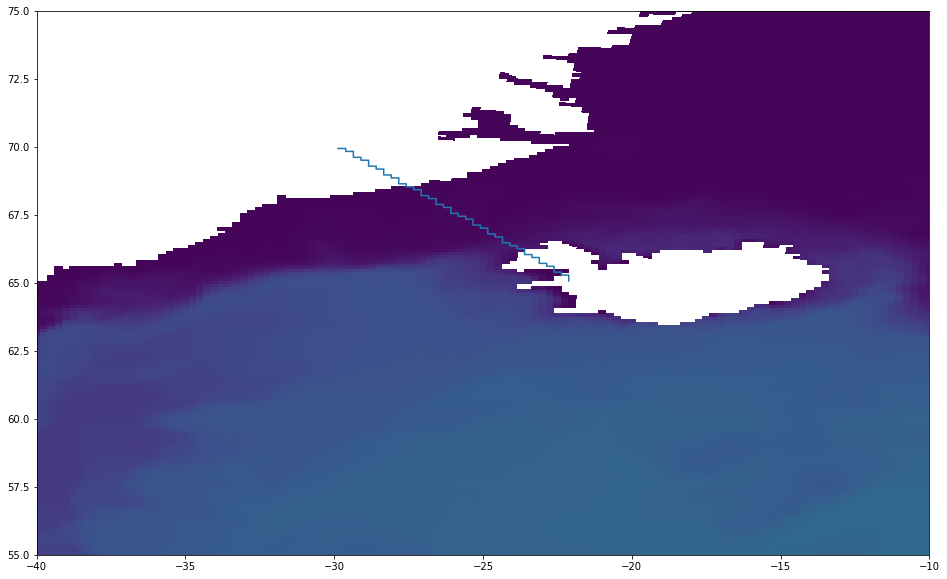

In [14]:
import matplotlib.pylab as plt
plt.figure(figsize=[16,10])
plt.pcolormesh(ds['lon'], ds['lat'], ds['tos'].isel(time=0, member_id=0))
plt.plot(xsec, ysec)
plt.axis([-40,-10, 55, 75])
plt.show()

The grid cell indices are then ready to be used to compute the section.

## The more detailed way

In [7]:
# create linear fit between these 2 points
func = sectionate.linear_fit(ds['lon'], ds['lat'], lon1, lat1, lon2, lat2)

In [8]:
# find the zero contour
cont = sectionate.create_zero_contour(func)

In [9]:
# get the broken line
iseg, jseg = sectionate.get_broken_line_from_contour(cont)

In [10]:
# bound broken line between 2 points
iseg_bnd, jseg_bnd, xseg_bnd, yseg_bnd = sectionate.bound_broken_line(ds['lon'], ds['lat'], lon1, lat1, 
                                                                      lon2, lat2, iseg, jseg)

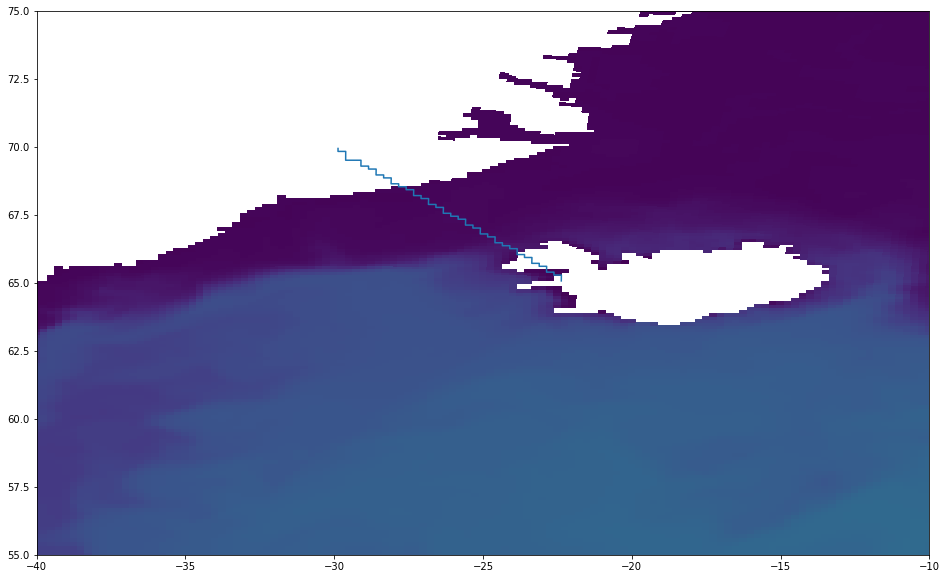

In [11]:
import matplotlib.pylab as plt
plt.figure(figsize=[16,10])
plt.pcolormesh(ds['lon'], ds['lat'], ds['tos'].isel(time=0))
plt.plot(xseg_bnd, yseg_bnd)
plt.axis([-40,-10, 55, 75])
plt.show()